In [1]:
from pymongo import MongoClient
import pandas as pd
import numpy as np

## Connect to database

In [2]:
client = MongoClient('mongodb://10.237.26.159', 27017)
database = client['media-db']
collections = {}
collections['aadhar'] = database['aadhar-all']
collections['gst'] = database['gst-all']
collections['demonetization'] = database['demonetization-all']
collections['farmers'] = database['farmers-all']

## Create histograms

In [4]:
articles = {} # articles for each policy-event
dateMap = {}  # no. of articles each day

for policy_name in collections:
    articles[policy_name] = collections[policy_name].find({})

for policy_name in articles:
    dateMap[policy_name] = {}
    
    for article in articles[policy_name]:
        ptime = pd.to_datetime( article['publishedDate'] )
        
        if ptime in dateMap[policy_name]:
            dateMap[policy_name][ptime] += 1
        else:
            dateMap[policy_name][ptime] = 1
    dateMap[policy_name] = pd.DataFrame([dateMap[policy_name]]).transpose()

## Plot histogram for each event (every day)

aadhar:	Total ->  13908 ; Variance ->  18.693403086272173 ; Mean ->  4.961826614341777
gst:	Total ->  22179 ; Variance ->  230.36921530985 ; Mean ->  8.378919531545145
demonetization:	Total ->  22302 ; Variance ->  395.6602096421718 ; Mean ->  7.770731707317073


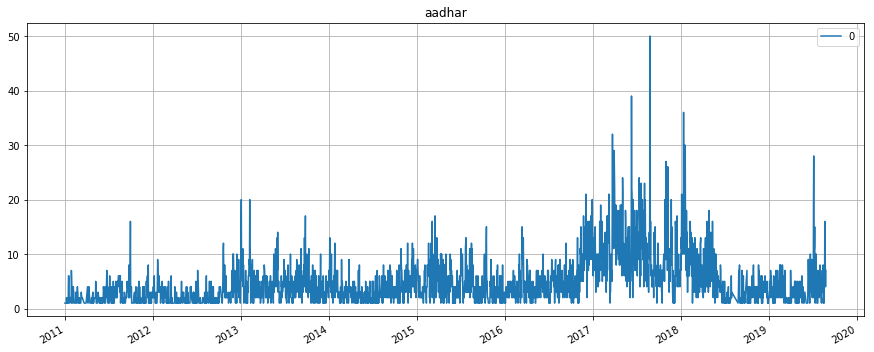

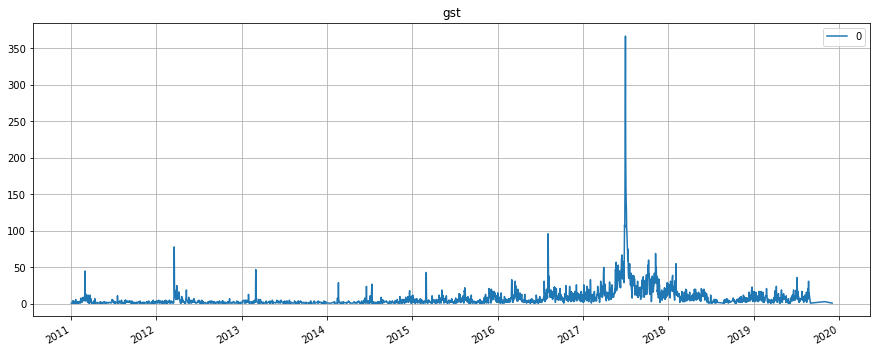

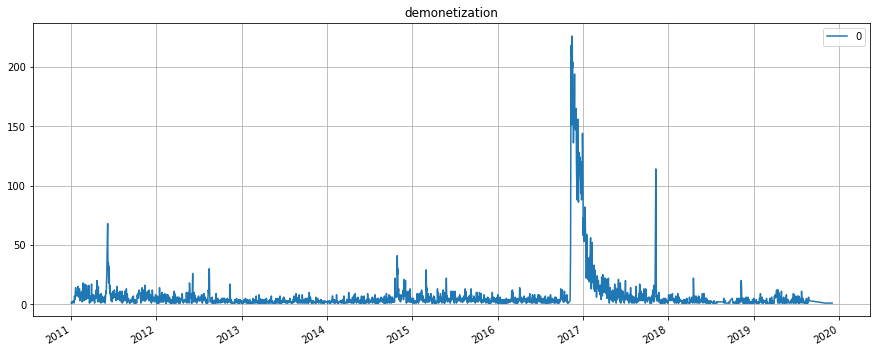

In [10]:
for policy_name in dateMap:
    total = sum(dateMap[policy_name].values)[0]
    variance = dateMap[policy_name].var(axis = 0)[0]
    mean = dateMap[policy_name].mean(axis = 0)[0]
    print( policy_name + ':\tTotal -> ', total, '; Variance -> ', variance, '; Mean -> ', mean )
    dateMap[policy_name].plot(figsize=(15, 6), grid = True, title=policy_name)

## Plot histogram for each event (per day, averaged over week)

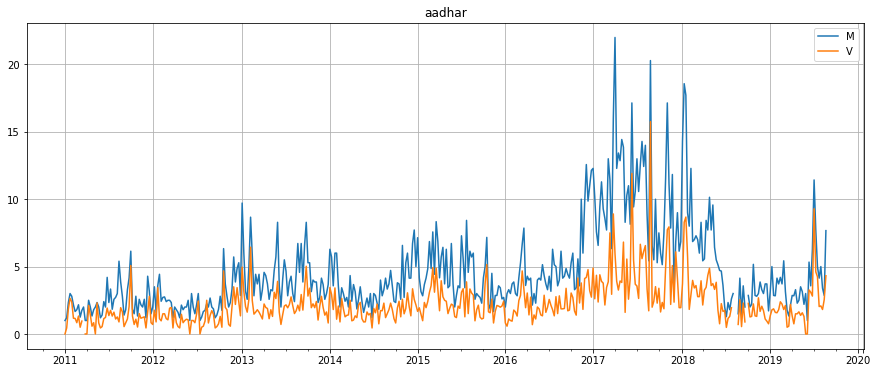

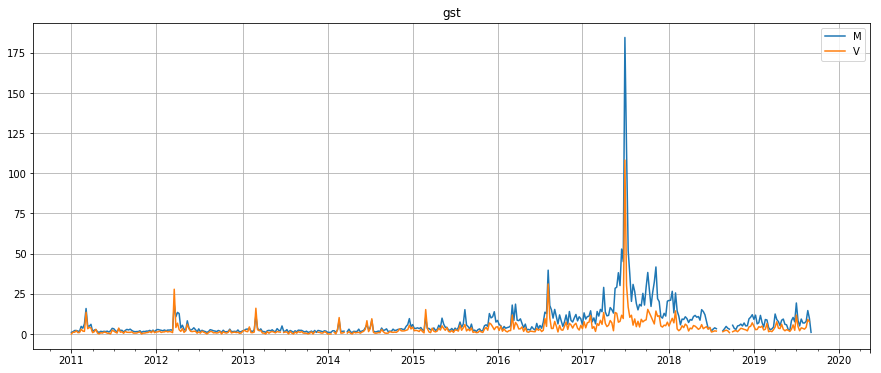

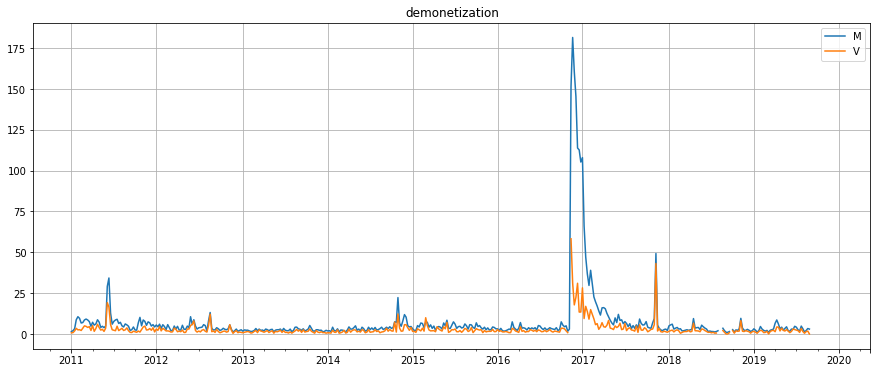

In [7]:
for policy_name in dateMap:
    #y['2012':]
    monthly_mean = dateMap[policy_name].resample('W').mean()
    monthly_var = dateMap[policy_name].resample('W').std()
    
    meanPlot = monthly_mean.plot()
    stdPlot = monthly_var.plot(ax=meanPlot, figsize=(15, 6), grid = True, title=policy_name)
    stdPlot.legend('MV')

## Plot histogram for each event (per day, averaged over month)

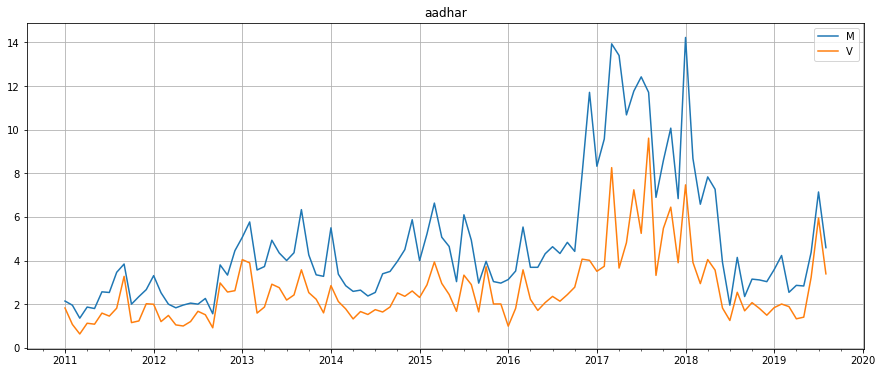

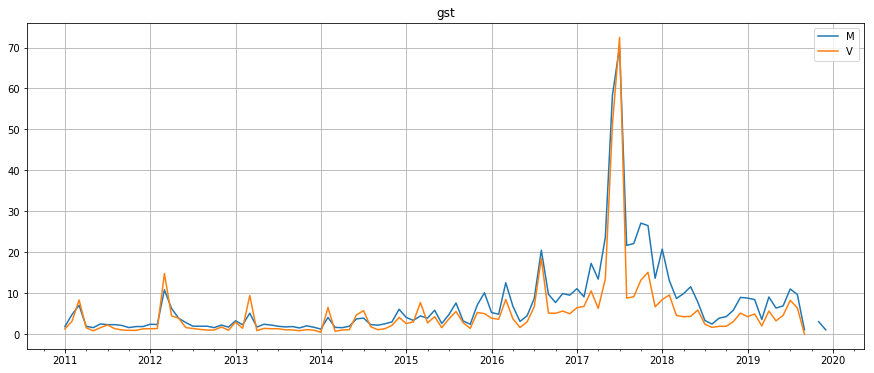

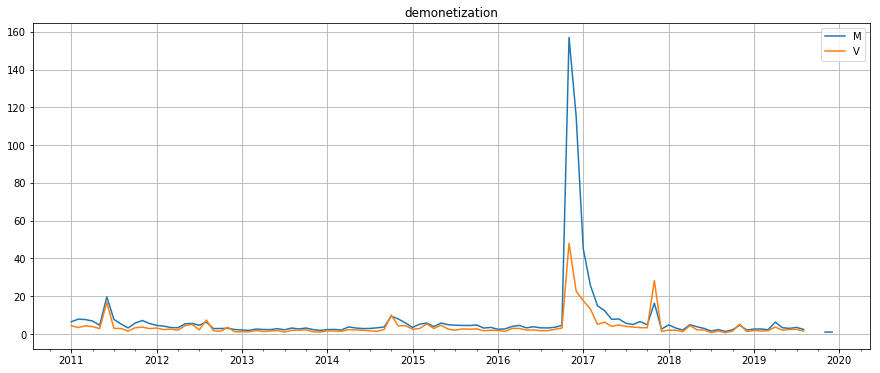

In [8]:
for policy_name in dateMap:
    #y['2012':]
    monthly_mean = dateMap[policy_name].resample('MS').mean()
    monthly_var = dateMap[policy_name].resample('MS').std()
    
    meanPlot = monthly_mean.plot()
    stdPlot = monthly_var.plot(ax=meanPlot, figsize=(15, 6), grid = True, title=policy_name)
    stdPlot.legend('MV')

## Plot histogram for each event (per day, averaged over year)

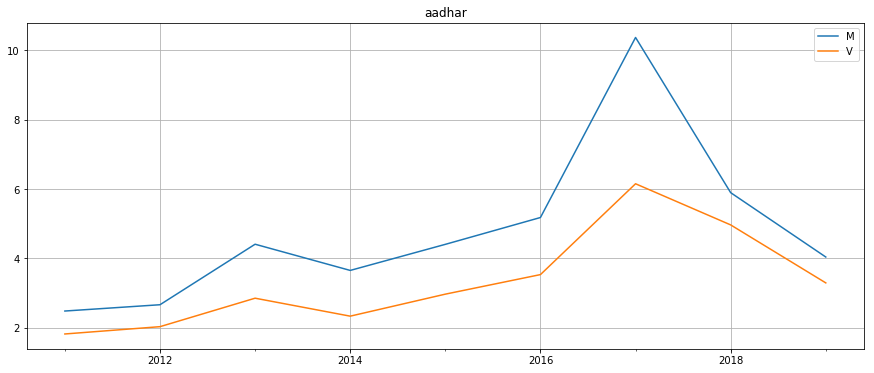

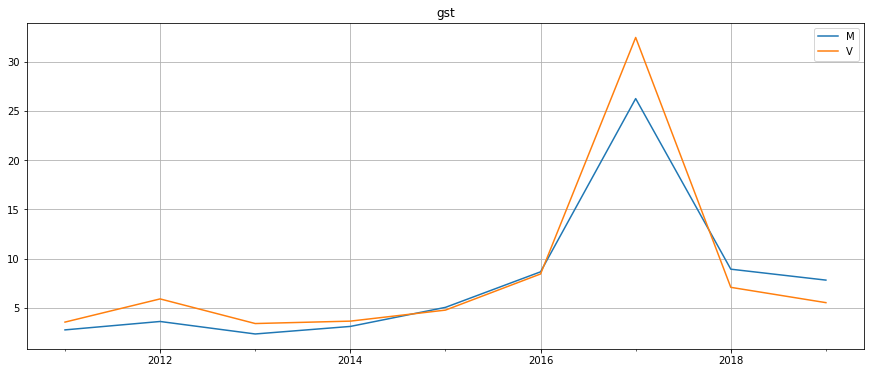

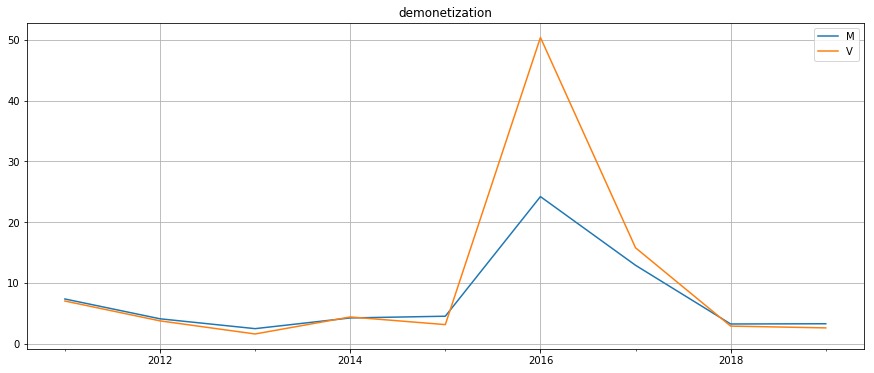

In [9]:
for policy_name in dateMap:
    #y['2012':]
    monthly_mean = dateMap[policy_name].resample('1y').mean()
    monthly_var = dateMap[policy_name].resample('1y').std()
    
    meanPlot = monthly_mean.plot()
    stdPlot = monthly_var.plot(ax=meanPlot, figsize=(15, 6), grid = True, title=policy_name)
    stdPlot.legend('MV')